# BMME890 - Fall 2019

## Wine Quality Project

Group: Nhan Pham, Khoi Huynh, Frank Wang, and Jiayi Xu

## Problem Overview

- Two datasets of red and white wine.
- Predict the quality of the red and white wine (score from 0 to 10)

## Dataset

- From UCI repository: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
- Size: 4898 samples, 12 features
- Features: 
    - `fixed acidity`
    - `volatile acidity`
    - `citric acid`
    - `residual sugar`
    - `chlorides`
    - `free sulfur dioxide`
    - `total sulfur dioxide`
    - `density`
    - `pH`
    - `sulphates`
    - `alcohol`

## Approach

The problem can be viewed in 2 ways:
- Classification
- Regression

### Classification

- Multilabel classification problem
- Labels: $0 - 10$
- Methods: random forest, SVM

### Regression

- Perform usual regression techniques
- Round the output to its nearest integer
- Methods: linear regression, ridge regression, lasso

In [4]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
# read red and white dataset and merge them
white_data=pd.read_csv('winequality-white.csv')
red_data=pd.read_csv('winequality-red.csv')

white_data_added=white_data
white_data_added['type']='white'

red_data_added=red_data
red_data_added['type']='red'

frames=[white_data_added, red_data_added]
dataset=pd.concat(frames, ignore_index=True)

dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white


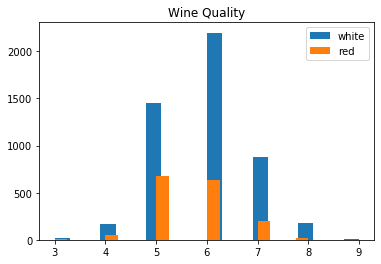

In [15]:
f,ax = plt.subplots(1,1)
ax.hist(dataset[dataset.type=='white'].quality, bins = 20)
ax.hist(dataset[dataset.type=='red'].quality, bins = 20)
ax.legend(['white','red'])
ax.set_title('Wine Quality')
plt.show()

In [7]:
# convert to categorical
dataset = pd.get_dummies(dataset)

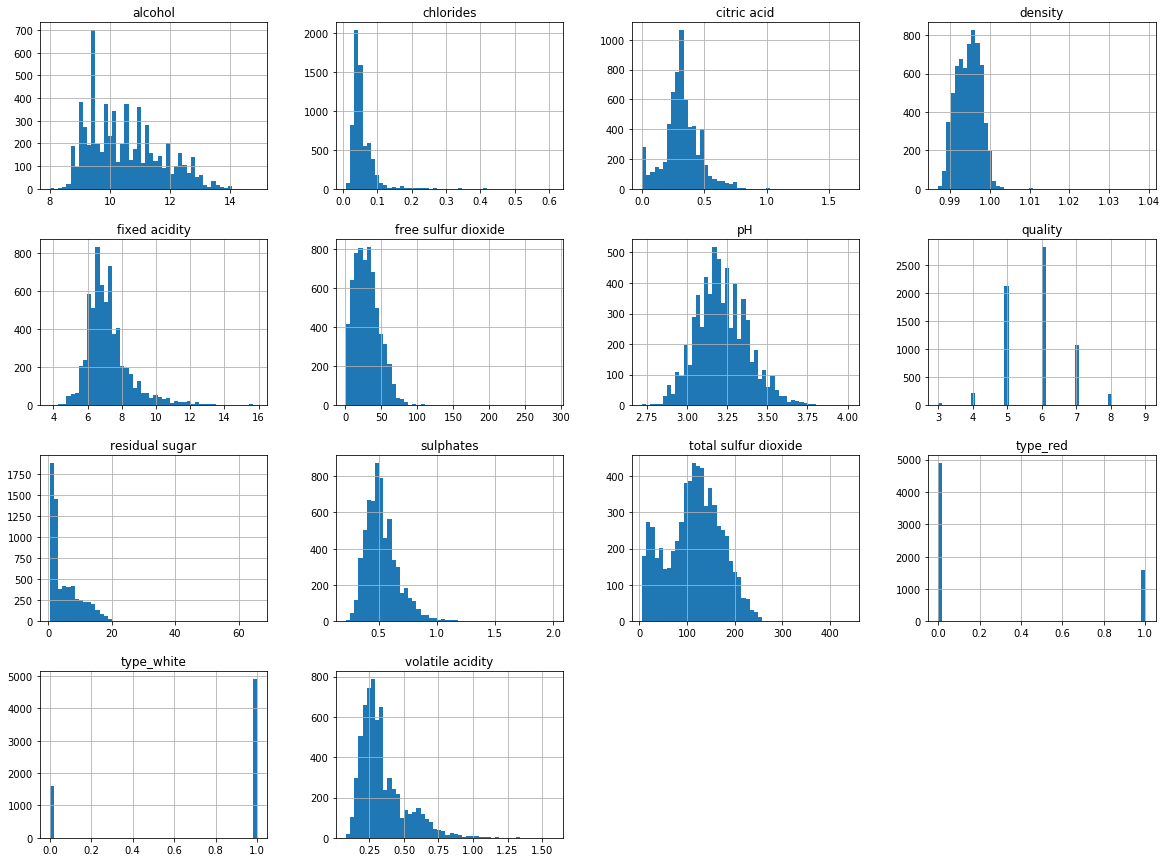

In [8]:
# histogram
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [10]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_red                0
type_white              0
dtype: int64

## Note:

- The data look clean, no capped value, no missing values.
- Samples are in range $[3,9]$.

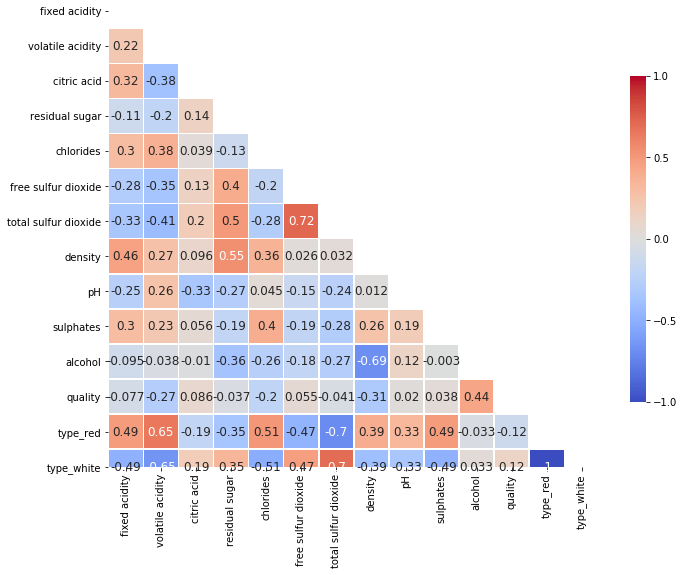

In [11]:
f, ax = plt.subplots(figsize=(11, 15)) 
corr_matrix = dataset.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(corr_matrix, mask = mask, square = True, linewidths = .5, cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

![SegmentLocal](figs/DinoSequentialSmaller.gif "segment")

## Imbalanced label classes

In [16]:
dataset['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [17]:
# split into features and labels
dataset_y=dataset['quality']
dataset_x=dataset
dataset_x.drop(['quality'],axis=1,inplace=True)

dataset_x_num = dataset.drop("type", axis=1)
dataset_x_cat=dataset[['type']]

## BoxCox transform

In [19]:
from scipy import stats

cat_feats = dataset_x.dtypes[dataset_x.dtypes == "object"].index
num_feats = dataset_x.dtypes[dataset_x.dtypes != "object"].index


# Check skewness in num features
skewed_feats = dataset_x[num_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features:")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(33)


Skew in numerical features:


,Skew
chlorides,5.398581
sulphates,1.796855
fixed acidity,1.722892
volatile acidity,1.494751
residual sugar,1.435073
free sulfur dioxide,1.219784
alcohol,0.565587
density,0.503485
citric acid,0.471622
pH,0.386749


In [20]:
# perform transformation
temp=skewness['Skew']
temp=temp[abs(temp)>0.75]
print("There are {} skewed numerical features to Box Cox transform".format(temp.shape[0]))

from scipy.special import boxcox1p
skewed_features = temp.index
lam = 0.15
for feat in skewed_features:
    dataset_x[feat] = boxcox1p(dataset_x[feat], lam)

There are 6 skewed numerical features to Box Cox transform


In [21]:
dataset_x_withonehot = pd.get_dummies(dataset_x)
dataset_x_withonehot.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,2.440268,0.243353,0.36,3.910703,0.044163,5.172535,170.0,1.0010,3.00,0.382113,8.8,0,1
1,2.316039,0.267595,0.34,1.027379,0.048009,3.340760,132.0,0.9940,3.30,0.410944,9.5,0,1
2,2.617971,0.251488,0.40,2.423101,0.048969,4.492018,97.0,0.9951,3.26,0.374800,10.1,0,1
3,2.474062,0.210262,0.32,2.678075,0.056619,5.248357,186.0,0.9956,3.19,0.345108,9.9,0,1
4,2.474062,0.210262,0.32,2.678075,0.056619,5.248357,186.0,0.9956,3.19,0.345108,9.9,0,1


In [32]:
def AccWithTol(model,tol,X,y):
    y_pred=model.predict(X)
    accuracy = (np.abs(y_pred - y) < tol )
    np.mean(accuracy)
    dict={'Label':y_test,'Pred':y_pred,'T/F':accuracy}
    a=pd.DataFrame(dict)
    val_cnt = a.Label.value_counts().sort_index()
    val_cnt = val_cnt.to_numpy()
    correct_cnt = []
    acc = []
    for i in range(3,9):
        sub_class = a[a.Label==i]
        correct_cnt.append(np.sum(sub_class['T/F']))
        acc.append(correct_cnt[-1] / val_cnt[i-3])
    new_dict = {'label': np.arange(3,9),'total_cnt': val_cnt,'correct_cnt': correct_cnt, 'acc': acc}
    new_df = pd.DataFrame(new_dict)
    return new_df

## Train-test split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_x_withonehot, dataset_y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error



In [29]:
n_folds = 5

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf,error_score=np.nan))
    return(rmse)

### LASSO

In [42]:
lasso = make_pipeline(
                RobustScaler(),
                Lasso(alpha =0.0005, random_state=1)
            )
score = rmsle_cv(lasso)
print("\nLasso score: mean {:.4f} std ({:.4f})\n".format(score.mean(), score.std()))
lasso.fit(X_train,y_train)
lasso_acc = AccWithTol(lasso,1,X_test,y_test)
lasso_acc


Lasso score: mean 0.7400 std (0.0108)



,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,6,0.130435
2,5,420,388,0.923810
3,6,579,570,0.984456
4,7,221,166,0.751131
5,8,32,0,0.000000


### Elastic Net

In [44]:
ENet = make_pipeline(
            RobustScaler(), 
            ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
            )
score = rmsle_cv(ENet)
print("\nscore: mean {:.4f} std ({:.4f})\n".format(score.mean(), score.std()))
ENet.fit(X_train,y_train)
enet_acc = AccWithTol(ENet,1,X_test,y_test)
enet_acc


score: mean 0.7400 std (0.0108)



,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,6,0.130435
2,5,420,388,0.923810
3,6,579,570,0.984456
4,7,221,166,0.751131
5,8,32,0,0.000000


### Kernel Ridge Regression

In [45]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("\nscore: mean {:.4f} std ({:.4f})\n".format(score.mean(), score.std()))
KRR.fit(X_train,y_train)
krr_acc = AccWithTol(KRR,1,X_test,y_test)
krr_acc


score: mean 0.7212 std (0.0154)



,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,8,0.173913
2,5,420,394,0.938095
3,6,579,570,0.984456
4,7,221,164,0.742081
5,8,32,0,0.000000


### Gradient Boosting

In [46]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("\nscore: mean {:.4f} std ({:.4f})\n".format(score.mean(), score.std()))
GBoost.fit(X_train,y_train)
gboost_acc = AccWithTol(GBoost,1,X_test,y_test)
gboost_acc


score: mean 0.6605 std (0.0232)



,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,20,0.434783
2,5,420,398,0.947619
3,6,579,558,0.963731
4,7,221,186,0.841629
5,8,32,12,0.375000


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
        'n_estimators': randint(low=1000, high=10000),
        'max_features': randint(low=1, high=10),
        'min_samples_leaf':randint(low=5,high=20),
        'min_samples_split':randint(low=1,high=10) 
    }
grid_search = RandomizedSearchCV(estimator = GBoost,
                           param_distributions=param_distribs,
                            n_iter=10,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           random_state=42,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_features': 5, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 7235}


In [48]:
grid_search.best_estimator_.fit(X_train,y_train)
gboost_grid_acc = AccWithTol(grid_search.best_estimator_,1,X_test,y_test)
gboost_grid_acc

,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,23,0.500000
2,5,420,400,0.952381
3,6,579,557,0.962003
4,7,221,185,0.837104
5,8,32,12,0.375000


### Average Model

In [39]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [49]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
averaged_models.fit(X_train,y_train)
avg_model_acc = AccWithTol(averaged_models,1,X_test,y_test)
avg_model_acc

 Averaged base models score: 0.6897 (0.0140)



,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,9,0.195652
2,5,420,402,0.957143
3,6,579,570,0.984456
4,7,221,174,0.787330
5,8,32,1,0.031250


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


averaged_models.fit(X_train,y_train)
y_pred=averaged_models.predict(X_test)
y_pred=np.round(y_pred,0)
test_accuracies = accuracy_score(y_test,y_pred)
print('\n\nTest set accuracy',test_accuracies)
cm_test = confusion_matrix(y_test, y_pred)
print('******Test set confusion matrix************')
print(cm_test)



Test set accuracy 0.5961538461538461
******Test set confusion matrix************
[[  0   0   2   0   0   0]
 [  0   2  32  12   0   0]
 [  0   1 259 160   0   0]
 [  0   0  90 452  37   0]
 [  0   0   3 156  62   0]
 [  0   0   0  15  17   0]]


## Summary

In [72]:
new_dict = {
        'Label': ['Class_'+str(x) for x in range(3,9)],
        'LASSO': lasso_acc.acc,
        'ElasticNet': enet_acc.acc, 
        'KernelRidge': krr_acc.acc,
        'GradientBoosting': gboost_grid_acc.acc,
        'AverageModel': avg_model_acc.acc,
}

reg_df = pd.DataFrame(new_dict)
reg_df.set_index('Label', inplace=True)
reg_df

,LASSO,ElasticNet,KernelRidge,GradientBoosting,AverageModel
Label,,,,,
Class_3,0.000000,0.000000,0.000000,0.000000,0.000000
Class_4,0.130435,0.130435,0.173913,0.500000,0.195652
Class_5,0.923810,0.923810,0.938095,0.952381,0.957143
Class_6,0.984456,0.984456,0.984456,0.962003,0.984456
Class_7,0.751131,0.751131,0.742081,0.837104,0.787330
Class_8,0.000000,0.000000,0.000000,0.375000,0.031250


In [70]:
reg_list = [lasso_acc, enet_acc, krr_acc, gboost_grid_acc, avg_model_acc]
total_acc = []
total_acc.extend([np.sum(x.correct_cnt) / np.sum(x.total_cnt) for x in  reg_list])

new_dict = {'Total Acc': total_acc}
reg_names = ['LASSO', 'Elastic Net', 'Kernel Ridge', 'Gradient Boosting', 'Average Model']
total_acc = pd.DataFrame(new_dict, index=reg_names)
total_acc

,Total Acc
LASSO,0.869231
Elastic Net,0.869231
Kernel Ridge,0.873846
Gradient Boosting,0.905385
Average Model,0.889231
